# AST4930 Homework Assignment #3 (20 pts)

### Instruction:

In this homework, we will use a subset of the SDSS DR16 data (https://www.sdss.org/dr16/) and train Support Vector Machines (SVM) which will be used to classify objects into galaxies, quasars, and stars. This is the same dataset we used for Homework Assignment #2. We learned that although SVM can be powerful, it is very slow. The SDSS data we will use have total 150,000 data points with 10 features (after we add colors). For SVM, this is not a small amount of data to deal with. In this homework assignment, we will think about how we can obtain a model without spending hours of computing times. For fair comparison, we will use 2 CPU cores. If you haven't already started this notebook with 2 CPU cores, please quit and start a new one using 2 CPUs. Use parameter "n_jobs=2" when relevant.

Below you will find instruction to this homework assignment (updated from Homework Assignment #2 so please read).

1. I learned that when I download your .ipynb file from Canvas, it automatically adds your name to the file name. So you don't have to put your last name manually as you did last time.

2. As you will see, the Notebook is partially filled. Fill in the empty cells. 

3. Note that there are questions you will have to answer. They will start with "Q: ..." The answers will be graded so make sure you answer all the questions.

4. It's fine you work on somewhere else than HiPerGator. But when I grade your homework, I will run your Jupyter Notebook on HiPerGator. So before you submit your homework, make sure you test it on HiPerGator and see if you get any error messages. For this particular homework assignment, we are concerned about the computing time so I'd like you all to use the HiPerGator resources for a fair comparison. 

5. It's fine if you use someone else's code you found on Internet, but make sure you write down the source. You don't have to cite me when you use anything from AST4930 Notebook. But as we learned from Homework Assignment #2, I do make mistakes. So please double-check before you copy and paste my script!

6. It's a common sense but just to make sure... when you make a figure, make sure they are readable/understandable. If you cannot see the title, labels, data points, or if you don't understand the point of the figure, I won't probably be able to see/understand them either!

6. Submit your final .ipynb file via Canvas before the due date.

### Let's load the data. This is the same dataset we used for Homework Assignment #2.

In [1]:
import pandas as pd 

data = pd.read_csv('/blue/ast4930/share/SDSS.csv')

### Let's have a look at the data to gain insights.

In [2]:
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237655107828973746,138.937318,49.779249,17.32152,16.28594,15.88471,15.66384,15.46604,2243,301,3,152,862475375345690624,GALAXY,0.028514,766,52247,131
1,1237678584114511952,31.594644,22.451246,18.13019,17.47997,16.97868,16.75768,16.83714,7709,301,3,65,2303710287351539712,QSO,1.694959,2046,53327,433
2,1237680298881122360,333.991221,19.977552,18.94798,18.80473,18.75522,18.72968,18.66552,8108,301,5,79,8532228490187264000,QSO,2.046520,7578,56956,578
3,1237650761319514319,186.201096,-2.808180,19.22969,18.04638,17.37830,16.99285,16.76479,1231,301,3,113,376103378880587776,GALAXY,0.000000,334,51993,192
4,1237648722280317126,124.814240,0.651496,18.76061,17.28682,16.74055,16.55152,16.45902,756,301,5,60,2316149895234349056,STAR,0.000196,2057,53816,632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1237673758185554973,100.889697,29.106283,19.17071,18.21106,17.80099,17.63203,17.53079,6585,301,6,121,3013004977846118400,STAR,0.000160,2676,54179,352
149996,1237671262268752282,124.964450,9.635759,19.38253,17.49415,16.55436,16.13420,15.80408,6004,301,5,61,2728125362876737536,GALAXY,0.110984,2423,54149,254
149997,1237673756573762584,98.821075,26.946457,18.90948,17.73591,17.31252,17.16612,17.07103,6585,301,3,103,3035579600630474752,STAR,0.000097,2696,54167,558
149998,1237678877782966354,320.766012,9.993010,17.63177,16.10855,15.35884,15.21912,15.11279,7777,301,6,66,821986413082863616,STAR,-0.000218,730,52466,289


### In addition to ugriz magnitudes, we will use colors (u-g, g-r, r-i, i-z) so let's make those arrays.

In [3]:
data['u-g'] = data.u-data.g
data['g-r'] = data.g-data.r
data['r-i'] = data.r-data.i
data['i-z'] = data.i-data.z

### Features and target

In [4]:
X = data[['u','g','r','i','z','u-g','g-r','r-i','i-z','redshift']]
y = data['class']

In [5]:
X

,u,g,r,i,z,u-g,g-r,r-i,i-z,redshift
0,17.32152,16.28594,15.88471,15.66384,15.46604,1.03558,0.40123,0.22087,0.19780,0.028514
1,18.13019,17.47997,16.97868,16.75768,16.83714,0.65022,0.50129,0.22100,-0.07946,1.694959
2,18.94798,18.80473,18.75522,18.72968,18.66552,0.14325,0.04951,0.02554,0.06416,2.046520
3,19.22969,18.04638,17.37830,16.99285,16.76479,1.18331,0.66808,0.38545,0.22806,0.000000
4,18.76061,17.28682,16.74055,16.55152,16.45902,1.47379,0.54627,0.18903,0.09250,0.000196
...,...,...,...,...,...,...,...,...,...,...
149995,19.17071,18.21106,17.80099,17.63203,17.53079,0.95965,0.41007,0.16896,0.10124,0.000160
149996,19.38253,17.49415,16.55436,16.13420,15.80408,1.88838,0.93979,0.42016,0.33012,0.110984
149997,18.90948,17.73591,17.31252,17.16612,17.07103,1.17357,0.42339,0.14640,0.09509,0.000097
149998,17.63177,16.10855,15.35884,15.21912,15.11279,1.52322,0.74971,0.13972,0.10633,-0.000218


### Just so you get a feeling: 

A 5-fold cross validation for a single parameter set (kernel='rbf', C=1, gamma=1) with 2 CPU cores on HiPerGator took me about 3.5 minutes to run. So if you were to optimize hyperparameters using 5 different C values and 5 different gamma values, for example, it would take about 25 x 3.5 = 87.5 minutes. 1.5 hours is certainly not undoable, but if you compare this to hyperparameter optimization timescale with kNN or DT it's certainly much longer.

In [6]:
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tstart = time.time()

model = cross_validate(SVC(kernel='rbf', C=1, gamma=1), X_train, y_train, cv=5, n_jobs=2)

print("Elapsed time: {:.2f}".format(time.time()-tstart)+" seconds")

Elapsed time: 175.37 seconds


### To be filled: write a script that (1) builds a SVM model, (2) optimizes hyperparameters, (3) measures the time it takes for the entire cell to run. The goal is to find a model with 97 % accuracy and computing time < 5 minutes. 

Here are a few things to note:

1. You can use multiple cells while you develop the script, but in the final notebook you will submit combine everything into a single cell and present the time it takes for the cell to run.

2. Make sure you print out the score of the final model and the total elapsed time because they are the two most important (but not the only) things that will be graded.

3. When you optimize hyperparameters, do not make the param_grid too small to reduce the time your script takes to run! Remember that you will always need at least 3x3 grid so you know you will have to explore a larger parameter space or not. 

4. For cross validation, use 5-fold CV (i.e., set cv=5).

5. You can use up to 2 CPU cores as needed (i.e., n_jobs=2).

6. Of course, the goal of this homework assignment is not to build a new SVM algorithm that is faster than the existing one. If you can do that (I can't), you don't have to take my class but instead go ahead and write a PhD thesis or submit a patent! What I want you to do is: Write a script and think about which part would take the longest time to run. Is there any way that you can reduce the computing time for that part? (hint: The final model has to be trained and tested with the entire train/test dataset, but for the time-consuming part do we have to use the entire dataset?)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'SVM__C': 100.0, 'SVM__gamma': 0.1}
Best model: Pipeline(steps=[('scaler', StandardScaler()), ('SVM', SVC(C=100.0, gamma=0.1))])
Test score: 0.98
Test score: 0.98
Elapsed time: 143.80 seconds


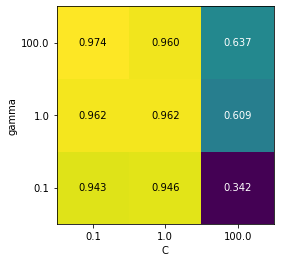

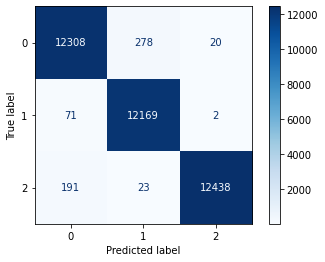

In [7]:
import time 
import pandas as pd
import numpy as np
import mglearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Do not put anything above this line except for those loading modules.

tstart = time.time()

# hyperparameter optimization using 5-fold CV
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X, y, random_state=0, train_size = 0.04)


pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('SVM', SVC(kernel='rbf'))
])

# Choose hyperparameters to optimize.
param_grid = {'SVM__C': [0.1,1.,100.],
              'SVM__gamma': [0.1,1.,100.]}

## grid search using cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=1, n_jobs=2)
grid_search.fit(X_train_small, y_train_small)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test_small, y_test_small)))

# make a heatmap
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(3,3)

mglearn.tools.heatmap(scores, xlabel='C', xticklabels=param_grid['SVM__C'],
                     ylabel='gamma', yticklabels=param_grid['SVM__gamma'], cmap='viridis', fmt="%.3f")


# make a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(grid_search.predict(X_test), y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# Fit your final model. This model is supposed to be your single best model.
model = grid_search.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model.fit(X_train, y_train)

# Make sure you print out the final model score.
print("Test score: {:.2f}".format(model.score(X_test, y_test)))

# Make sure you print out the total elapsed time to run this cell.
print("Elapsed time: {:.2f}".format(time.time()-tstart)+" seconds")

# Do not put anything below this line 


### To be filled: compute the permutation feature importance and make a plot showing the result

In [9]:
from sklearn.inspection import permutation_importance

tstart = time.time()

### Fill in this line. Use n_repeats=5 and n_jobs=2. It took me about 7 minutes on HiPerGator.
r = permutation_importance(model, X_test, y_test, n_repeats=5, n_jobs=2, random_state=0)

print("Elapsed time: {:.2f}".format(time.time()-tstart)+" seconds")

Elapsed time: 370.91 seconds


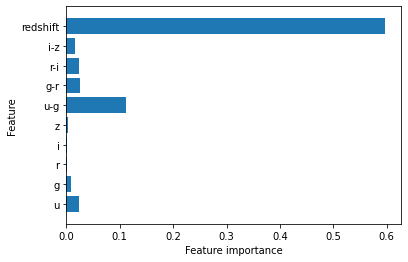

In [10]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), r.importances_mean, align='center')
    plt.yticks(np.arange(n_features), np.array(X_train.columns))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(r)

### Q: Compare the permutation feature important with the DT feature importance you obtained in Homework Assignment #2 and comment.

The permutation importance for this homework is similar but not the same as the DT feature importance. For homework 2 the redshift went to around .6 on the feature importance axis and ug went to around .45. For this graph, redshift has a higher importance and ug is still important up to around .15, it doesn't have as much weight as it did in the DT bar graph. 